<a href="https://colab.research.google.com/github/anasfrh/notebooks/blob/master/Gold%20portfolio%20vs%20the%20market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import files
import io

In [6]:
uploaded = files.upload()

Saving gold spx.csv to gold spx (1).csv


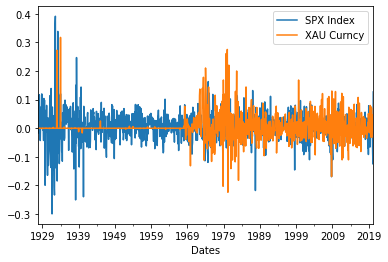

In [8]:
tickers = pd.read_csv(io.StringIO(uploaded['gold spx.csv'].decode('utf-8')),index_col=0,parse_dates=True)
monthlyReturns = tickers.pct_change()
monthlyReturns.plot()

The lack of any volatility in the first 50 years for the gold/usd spot price is due to the fact that the gold standard was still in place at that time.

In [0]:
allocation = [0.6,0.4]
weightedReturn = monthlyReturns.dot(allocation)

In [0]:
portfolio = pd.DataFrame({
                        "Portfolio":100*(1 + weightedReturn).cumprod(),
                         "Index": 100*(1 + monthlyReturns["SPX Index"]).cumprod()
                         })

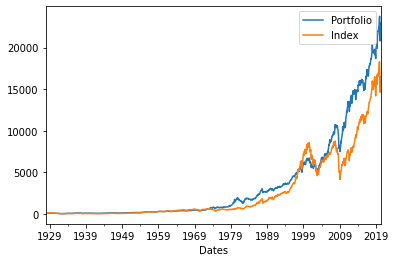

In [15]:
portfolio.plot()

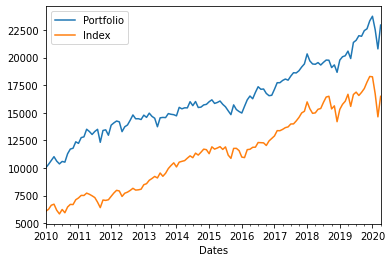

In [17]:
portfolio["2010":"2020"].plot()

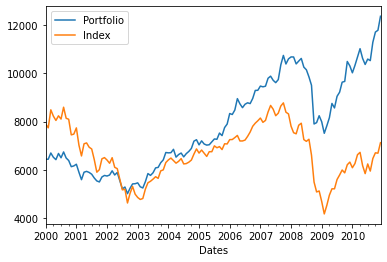

In [19]:
portfolio["2000":"2010"].plot()

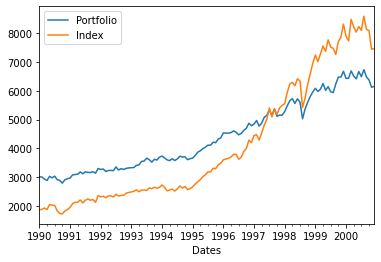

In [21]:
portfolio["1990":"2000"].plot()

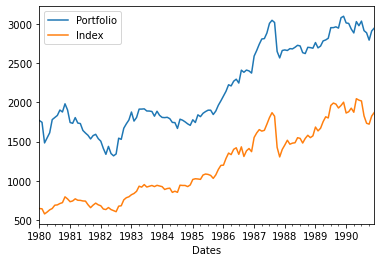

In [23]:
portfolio["1980":"1990"].plot()

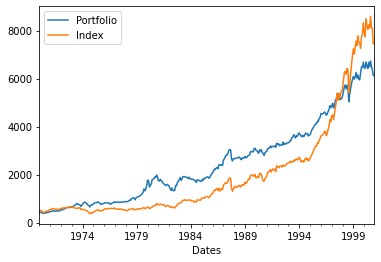

In [25]:
portfolio["1970":"2000"].plot()

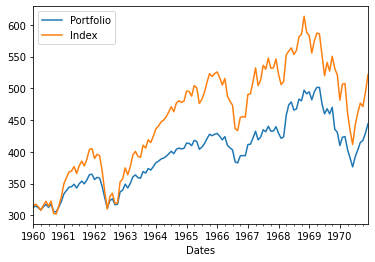

In [27]:
portfolio["1960":"1970"].plot()

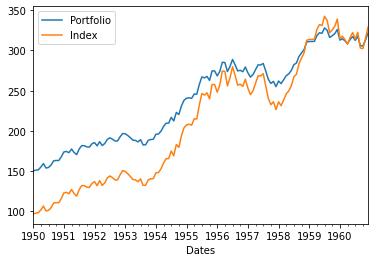

In [29]:
portfolio["1950":"1960"].plot()

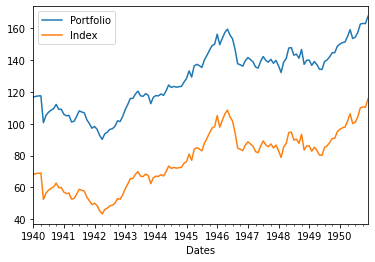

In [31]:
portfolio["1940":"1950"].plot()

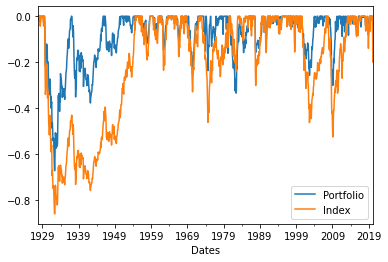

In [33]:
peaks = portfolio.cummax()
drawdown = (portfolio - peaks) / peaks
drawdown.plot()

Not only did the 60/40 portfolio outperform the S&P 500 but it also generated higher returns with lower risk as measured by drawdowns.

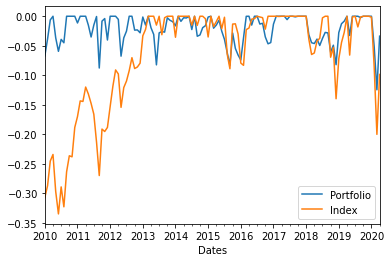

In [35]:
drawdown["2010":"2020"].plot()

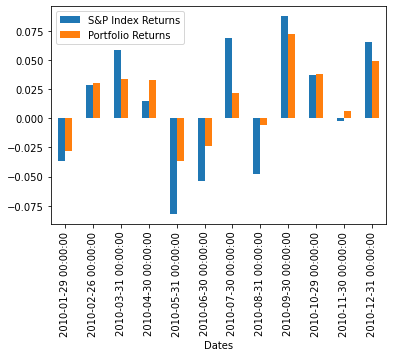

In [37]:
returnMatrix = pd.DataFrame({"S&P Index Returns":monthlyReturns["SPX Index"],
                             "Gold Returns":monthlyReturns["XAU Curncy"],
                             "Portfolio Returns":weightedReturn
                            })

returnMatrix[["S&P Index Returns","Portfolio Returns"]]["2010":"2010"].plot.bar()

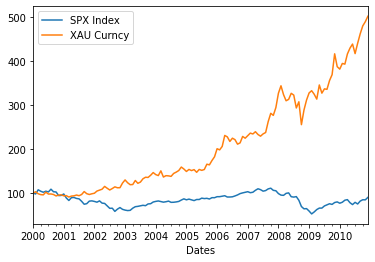

In [39]:
(tickers["2000":"2010"]*100 / (tickers["2000":"2010"]["SPX Index"][0],tickers["2000":"2010"]["XAU Curncy"][0])).plot()

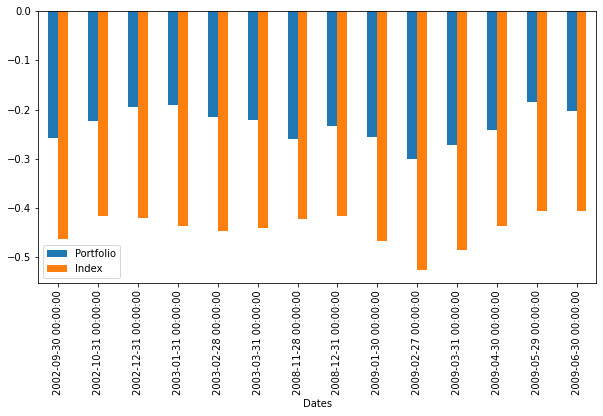

In [40]:
drawdown[drawdown["Index"]<-0.4]["1990":].plot.bar(figsize=(10,5))